In [37]:
import pandas as pd
from datetime import datetime, date
# import asyncio
# import aiohttp
import matplotlib.pyplot as plt
# import nest_asyncio
import numpy as np

import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN  
from sklearn.svm import OneClassSVM

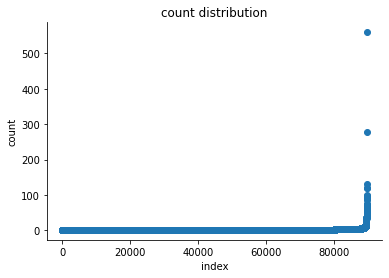

In [12]:
# dateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('dth.csv', index_col='index')
df = df[df.columns.difference(['date'])]

# df = df[df['Category'] == 6]
plt.scatter(range(df.shape[0]), np.sort(df['count'].values))
plt.xlabel('index')
plt.ylabel('count')
plt.title("count distribution")
sns.despine()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


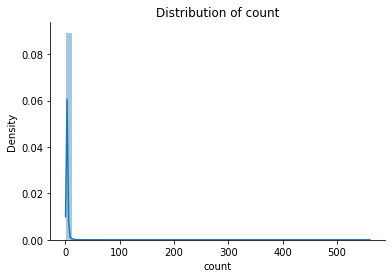

In [13]:
sns.distplot(df['count'])
plt.title("Distribution of count")
sns.despine()

In [ ]:
sns.regplot(x="weather", y="count", data=df)
sns.despine();


In [ ]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

In [142]:
from sklearn.cluster import KMeans

In [143]:
model = KMeans(n_clusters=2)
model.fit(df)

KMeans(n_clusters=2)

In [144]:
all_predictions = model.predict(df)

In [2]:
outlier_fraction = 0.1

In [19]:
from pyod.utils.data import generate_data, get_outliers_inliers

x_train = df[df.columns.difference(['count'])]
y_train = df[['count']]  

In [24]:
clf = KNN(contamination = outlier_fraction) 
clf.fit(x_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyod/models/base.py:349: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [34]:
scores_pred = clf.decision_function(x_train)*-1
  
y_pred = clf.predict(x_train) 

In [33]:
len(scores_pred)

89577

In [52]:
df_x = df[['Category', 'District', 'dayoff', 'hour', 'weather', 'count']]

In [53]:
nu = 0.05  
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)


In [54]:
ocsvm.fit(df_x)

OneClassSVM(gamma=0.05, nu=0.05)

In [55]:
pred_ocsvm = ocsvm.predict(df_x)


In [56]:
X_outliers = df_x[ocsvm.predict(df_x) == -1]
X_outliers

,Category,District,dayoff,hour,weather,count
index,,,,,,
3,5,5,1,0,-0.975,7
8,4,10,1,1,-0.975,7
11,5,3,1,1,-0.975,15
30,4,14,1,5,-0.975,5
39,5,11,1,6,-0.975,1
...,...,...,...,...,...,...
89503,1,6,0,17,13.725,1
89534,2,10,0,19,13.725,13
89538,5,16,0,19,13.725,6


In [58]:
iforest = IsolationForest(n_estimators=300, contamination=0.10)
iforest = iforest.fit(df_x)

In [79]:
pred_isoF = iforest.predict(df_x[:1])
pred_isoF

array([-1])

In [73]:
isoF_outliers = df_x[iforest.predict(df_x) == -1]
isoF_outliers

In [74]:
import pickle
with open('iforest','wb') as f:
    pickle.dump(iforest, f)

In [106]:
import time
start_time = time.time()

predicted = iforest.predict(df_x.values.tolist()).tolist()
time.time() - start_time

4.803423881530762

In [108]:
len(predicted)

89577

In [113]:
df_x

,Category,District,dayoff,hour,weather,count
index,,,,,,
0,2,0,1,0,-0.975,1
1,2,1,1,0,-0.975,2
2,5,3,1,0,-0.975,1
3,5,5,1,0,-0.975,7
4,5,12,1,0,-0.975,1
...,...,...,...,...,...,...
89572,2,3,0,23,13.725,1
89573,2,10,0,23,13.725,5
89574,2,15,0,23,13.725,1
